<a href="https://colab.research.google.com/github/Code-Abbey/Machine-Learning-With-Python-Excersise/blob/main/group_8_assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: Approve or Decline Loans

In this assignment, we will use a dataset of loan applications to predict whether a loan should be approved or declined.
Your task is to build a model that can predict the outcome of a loan application based on the given features.

### Dataset
- **Source:** https://raw.githubusercontent.com/schauppi/Intro_ML/main/datasets/loan_data.csv

### Steps:

1. **Explore the Data with Pandas**
    - Load the data
    - Display the first few rows of the data
    - Check for missing values
    - Get basic information about the data
    - Convert categorical variables to numerical (Because we want to use a machine learning algorithm and they require numerical input)
    - Get basic descriptive statistics
2. **Data Visualization**
    - Use Matplotlib to create visualizations to understand the data and spot potential patterns
    - Plot the following:
        - Distribution of person age
        - Gender distribution
        - Loan status proportion
        - Loan amount vs. income
3. **Prepare the Data for Modeling**
    - Get the target and features
    - Scale the features using `MinMaxScaler`
    - Split the data into training and testing sets
4. **Modeling**
    - Train and evaluate an `SVM` with a `linear` kernel
    - Train and evaluate an `SVM` with a `RBF` kernel
    - Train and evaluate a `SVM` with a `polynomial` kernel
5. **Grid Search**
    - Use `GridSearchCV` to find the best hyperparameters for the `SVM` with a `RBF` kernel
    - Set the parameters to search over:
        - `C`: 0.1, 0.5, 1, 5, 10
        - `kernel`: 'rbf'
    - Set the number of cross-validation folds to 2
    - Set the scoring metric to `f1`
6. **Train and Evaluate the Model with the Best Hyperparameters**
    - Train the `SVM` with the best hyperparameters found by `GridSearchCV`
    - Evaluate the model on the testing set
    - Print the accuracy, precision, recall, and F1 score of the model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

### 1. Explore the Data with Pandas

In [2]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/schauppi/Intro_ML/main/datasets/loan_data.csv')

In [3]:
# Display the first few rows of the data
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
# Check for missing values
data.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [5]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

#### Data Conversion

We are converting **categorical** (text-based) variables into **numerical values** using **label encoding**. This is necessary because **machine learning algorithms** can only process numerical data.

**Conversions**:
 - **Gender**: female (0), male (1)
 - **Education**: High School (0), Bachelor (1), Master (2), Associate (3), Doctorate (4)
 - **Home Ownership**: MORTGAGE (0), RENT (1), OWN (2), OTHER (3)
 - **Loan Intent**: PERSONAL (0), EDUCATION (1), MEDICAL (2), VENTURE (3), HOMEIMPROVEMENT (4), DEBTCONSOLIDATION (5)
 - **Previous Defaults**: No (0), Yes (1)

Using Pandas' `map()` function, we assign numerical values to each category. This allows our data to be processed by **machine learning algorithms** while maintaining the distinct categories in our dataset.

In [7]:
# Convert categorical variables to numerical
data['person_gender']=data['person_gender'].map({"female":0 ,"male":1})
data['person_education']=data['person_education'].map({"High School":0 ,"Bachelor":1 , 'Master':2 , 'Associate':3 , 'Doctorate':4})
data['person_home_ownership']=data['person_home_ownership'].map({"MORTGAGE":0 ,"RENT":1 , 'OWN':2 , 'OTHER':3})
data['loan_intent']=data['loan_intent'].map({"PERSONAL":0 ,"EDUCATION":1 , 'MEDICAL':2 , 'VENTURE':3 , 'HOMEIMPROVEMENT':4 , 'DEBTCONSOLIDATION':5})
data['previous_loan_defaults_on_file']=data['previous_loan_defaults_on_file'].map({"No":0 ,"Yes":1})

In [8]:
# Display the first few rows of the data and check if the conversion was successful
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,2,71948.0,0,1,35000.0,0,16.02,0.49,3.0,561,0,1
1,21.0,0,0,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,0,12438.0,3,0,5500.0,2,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,1,35000.0,2,15.23,0.44,2.0,675,0,1
4,24.0,1,2,66135.0,1,1,35000.0,2,14.27,0.53,4.0,586,0,1


In [9]:
# Get basic descriptive statistics
data.describe()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000.000000,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,0.552022,1.465044,8.031905e+04,5.410333,0.659911,9583.157556,2.323622,11.006606,0.139725,5.867489,632.608756,0.507956,0.222222
std,6.045108,0.497292,1.182487,8.042250e+04,6.063532,0.609255,6314.886691,1.672702,2.978808,0.087212,3.879702,50.435865,0.499942,0.415744
min,20.000000,0.000000,0.000000,8.000000e+03,0.000000,0.000000,500.000000,0.000000,5.420000,0.000000,2.000000,390.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,4.720400e+04,1.000000,0.000000,5000.000000,1.000000,8.590000,0.070000,3.000000,601.000000,0.000000,0.000000
50%,26.000000,1.000000,1.000000,6.704800e+04,4.000000,1.000000,8000.000000,2.000000,11.010000,0.120000,4.000000,640.000000,1.000000,0.000000
75%,30.000000,1.000000,3.000000,9.578925e+04,8.000000,1.000000,12237.250000,4.000000,12.990000,0.190000,8.000000,670.000000,1.000000,0.000000
max,144.000000,1.000000,4.000000,7.200766e+06,125.000000,3.000000,35000.000000,5.000000,20.000000,0.660000,30.000000,850.000000,1.000000,1.000000


### 2. Data Visualization

You will visualize the distribution of **person age**, **gender distribution**, **loan status proportion**, and the relationship between **loan amount and income** to better understand our dataset.


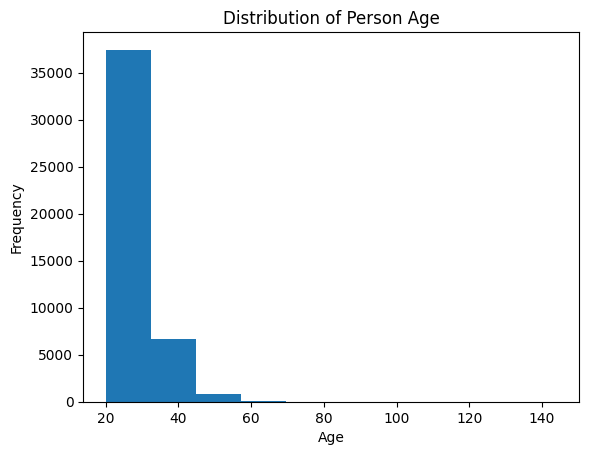

In [10]:
# Plot distribution for 'person_age'
data['person_age'].plot(kind='hist')
plt.title("Distribution of Person Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Create a bar plot showing gender distribution in the dataset using `value_counts()` with blue for female (0) and pink for male (1) to visualize gender balance in loan applications.


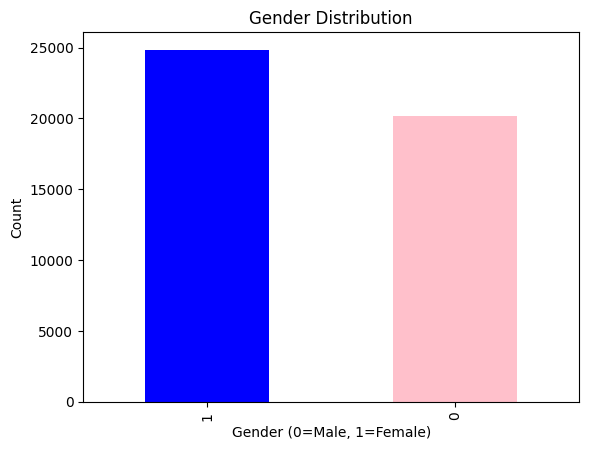

In [11]:
# Bar plot for 'person_gender'
data['person_gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title("Gender Distribution")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.ylabel("Count")
plt.show()

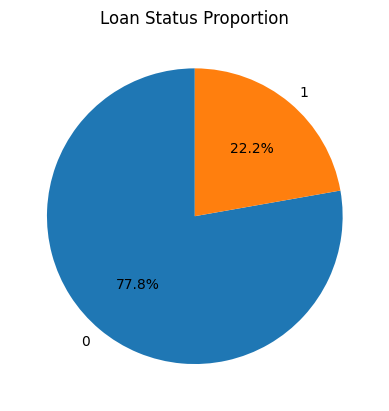

In [12]:
# Pie chart for 'loan_status'
data['loan_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Loan Status Proportion")
plt.ylabel("") # Hide the y-label
plt.show()


### 3. Prepare the Data for Modeling

Here you will separate the target and features, scale the features using `MinMaxScaler`, and split the data into training and testing sets using `train_test_split()`.

In [15]:
# Separate the target and features (Remember - we want to predict the loan status)
y = data['loan_status']
X = data.drop(columns=['loan_status'])

In [16]:
#scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [19]:
# Print the shapes of the training and testing target and features
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training set shape: (36000, 13)
Testing set shape: (9000, 13)
Training target shape: (36000,)
Testing target shape: (9000,)


### 4. Modeling

You will train and evaluate an `SVM` with a `linear` kernel, an `SVM` with a `RBF` kernel, and an `SVM` with a `polynomial` kernel.


#### Linear Kernel

In [20]:
# Train and evaluate an SVM with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
# get predictions
y_pred_linear = svm_linear.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Precision:", precision_score(y_test, y_pred_linear))
print("Recall:", recall_score(y_test, y_pred_linear))
print("F1 Score:", f1_score(y_test, y_pred_linear))

Accuracy: 0.8852222222222222
Precision: 0.7608115323011212
Recall: 0.7089552238805971
F1 Score: 0.7339685809940767


#### RBF Kernel

In [22]:
# Train and evaluate an SVM with a RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

In [24]:
# get predictions
y_pred = svm_rbf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Accuracy: 0.9025555555555556
Precision: 0.8080478520935291
Recall: 0.7393034825870647
F1 score: 0.7721486100285788


#### Polynomial Kernel

In [25]:
# Train and evaluate an SVM with a polynomial kernel
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [26]:
# get predictions
y_pred = svm_poly.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Accuracy: 0.9025555555555556
Precision: 0.8272674754477181
Recall: 0.7124378109452736
F1 score: 0.7655707030205827


### 5. Grid Search

You will use `GridSearchCV` to find the best hyperparameters for the `SVM` with a `RBF` kernel.


In [27]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'kernel': ['rbf']
}

In [30]:
# Train and evaluate an SVM with a RBF kernel using GridSearchCV
svm_rbf_gs = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_rbf_gs, param_grid, scoring='f1', cv=2)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'kernel': ['rbf']},
             scoring='f1')

In [31]:
# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 10, 'kernel': 'rbf'}
Best score: 0.7804382446283448


### 6. Train and Evaluate the Model with the Best Hyperparameters

Here you will train the `SVM` with the best hyperparameters found by `GridSearchCV` and evaluate it on the testing set.

In [32]:
# Train the SVM with the best hyperparameters found by GridSearchCV
svm_rbf_gs = grid_search.best_estimator_
svm_rbf_gs.fit(X_train, y_train)

SVC(C=10)

In [33]:
# get predictions
y_pred = svm_rbf_gs.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Accuracy: 0.9067777777777778
Precision: 0.8280112044817927
Recall: 0.7353233830845771
F1 score: 0.7789196310935441
